In [ ]:
#Load MNIST Dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import cv2  # Used for resizing images

# Load MNIST dataset (handwritten digits 0–9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()



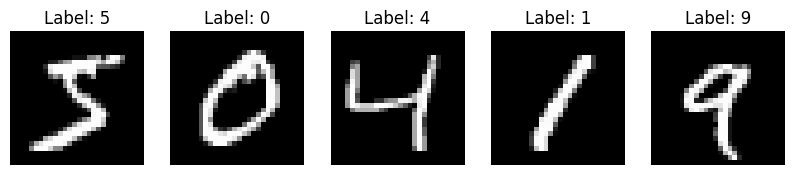

In [ ]:
# Display first 5 images from training data
plt.figure(figsize=(10,2))  # Set figure size

for i in range(5):
    plt.subplot(1,5,i+1)  # Create subplots
    plt.imshow(X_train[i], cmap='gray')  # Display image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Show digit label
    plt.axis('off')  # Hide axes

plt.show()


In [ ]:
# Preprocessing Step 1: Check Image Shape
X_train.shape  # (60000, 28, 28)
#You have 60,000 grayscale images,
#Each image is 28 × 28 pixels,
#Each pixel stores an intensity value (0–255).

(60000, 28, 28)

In [ ]:
# Flatten 28x28 images into 784 features-For Logistic Regression, SVM, KNN
#-1 tells Python: “figure this dimension automatically”
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat.shape  # (60000, 784)


(60000, 784)

In [ ]:
# Add channel dimension (For Deep Learning (CNN format) required for CNNs)-1 indicates grayscale channel
#(samples, height, width, channels)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

X_train_cnn.shape  # (60000, 28, 28, 1)


(60000, 28, 28, 1)

In [ ]:
# Normalize pixel values from 0–255 to 0–1-Improves model convergence and accuracy
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0


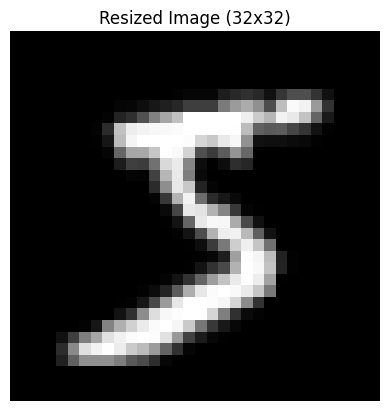

In [ ]:
#Preprocessing Step 4: Resize Images (Example: 28×28 → 32×32)-Useful when adapting MNIST to CNN architectures like LeNet
# Resize a single MNIST image to 32x32
resized_img = cv2.resize(X_train[0], (32, 32))

# Display resized image
plt.imshow(resized_img, cmap='gray')
plt.title("Resized Image (32x32)")
plt.axis('off')
plt.show()


In [ ]:
#Preprocessing Step 5: One-Hot Encode Labels (Optional)-Required for neural networks with softmax output
from tensorflow.keras.utils import to_categorical

# Convert class labels into one-hot encoded format
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
